In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [13]:
data = pd.read_csv("housing.csv")

In [14]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [15]:
data.shape

(645, 7)

In [43]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [16]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [51]:
for feature in dataset :
    print(f" {feature} :   {dataset[feature].nunique()} unique values")



 Sqft :   288 unique values
 Floor :   21 unique values
 TotalFloor :   25 unique values
 Bedroom :   7 unique values
 Living.Room :   5 unique values
 Bathroom :   6 unique values
 Price :   153 unique values


In [44]:
dataset = data.copy()

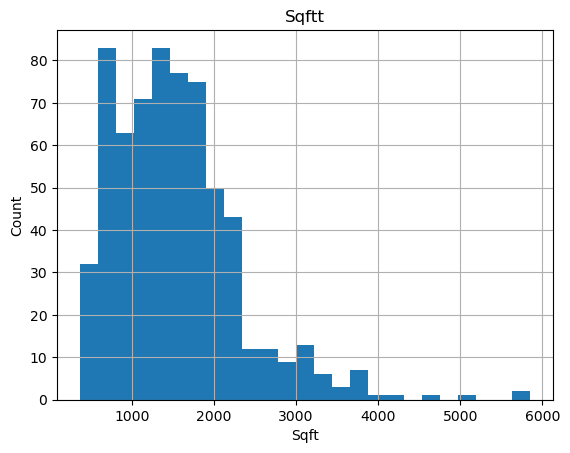

In [45]:
dataset["Sqft"].hist(bins=25)
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.title("Sqftt")
plt.show()

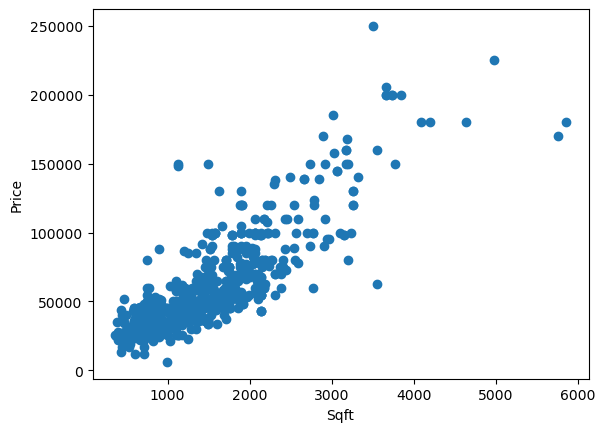

In [46]:
plt.scatter(dataset["Sqft"],data['Price'])
plt.xlabel("Sqft")
plt.ylabel('Price')
plt.show()

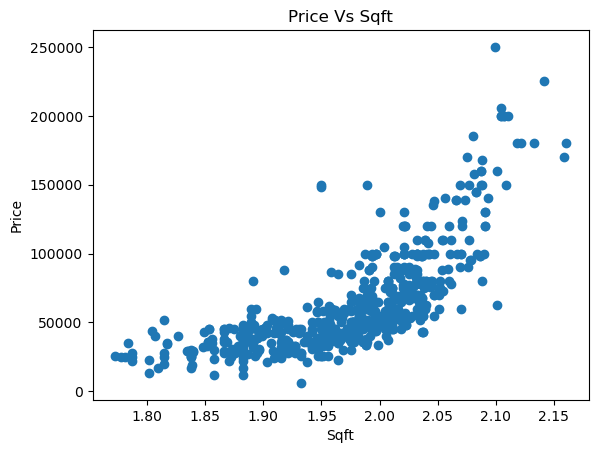

In [47]:


dataset["Sqft"]=np.log(dataset["Sqft"])
dataset["Sqft"] = np.log(dataset["Sqft"])
plt.scatter(dataset["Sqft"],dataset['Price'])
plt.xlabel("Sqft")
plt.ylabel('Price')
plt.title("Price Vs Sqft")
plt.show()

In [48]:
dataset["TotalFloor"].nunique()

25

In [37]:
dataset["TotalFloor"].value_counts()

7     161
12    113
14     68
4      36
6      36
9      30
5      30
13     30
15     28
21     18
19     17
11     16
16     13
25     10
17      8
18      8
10      8
24      4
8       3
20      2
27      2
3       1
38      1
26      1
1       1
Name: TotalFloor, dtype: int64

Text(0.5, 1.0, 'House Price vs TotalFloor')

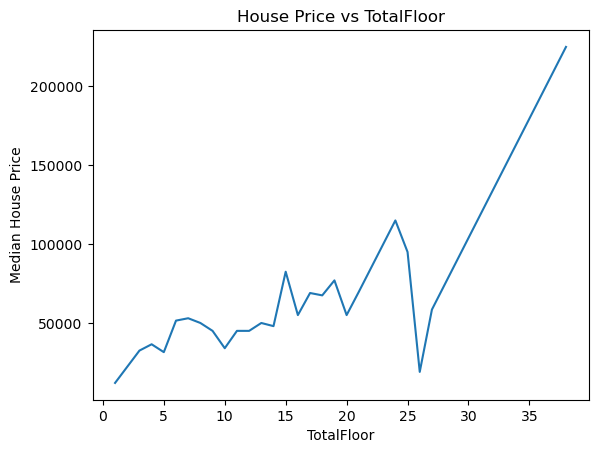

In [38]:
dataset.groupby('TotalFloor')['Price'].median().plot()
plt.xlabel('TotalFloor')
plt.ylabel('Median House Price')
plt.title("House Price vs TotalFloor")

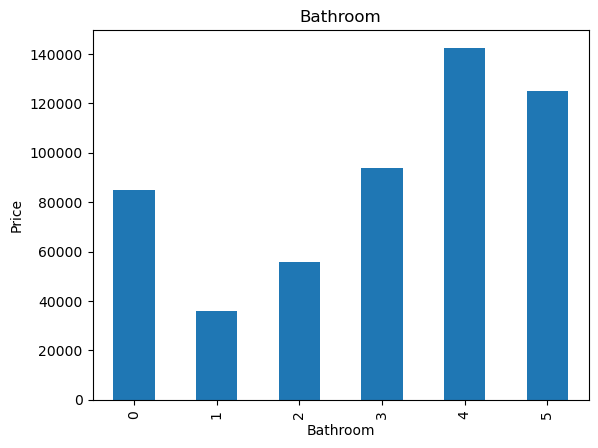

In [30]:
dataset.groupby("Bathroom")['Price'].median().plot.bar()
plt.xlabel("Bathroom")
plt.ylabel('Price')
plt.title("Bathroom")
plt.show()

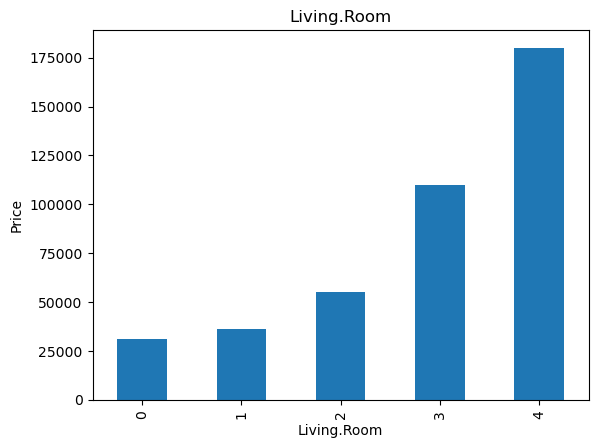

In [31]:
dataset.groupby("Living.Room")['Price'].median().plot.bar()
plt.xlabel("Living.Room")
plt.ylabel('Price')
plt.title("Living.Room")
plt.show()

In [42]:
#outlier

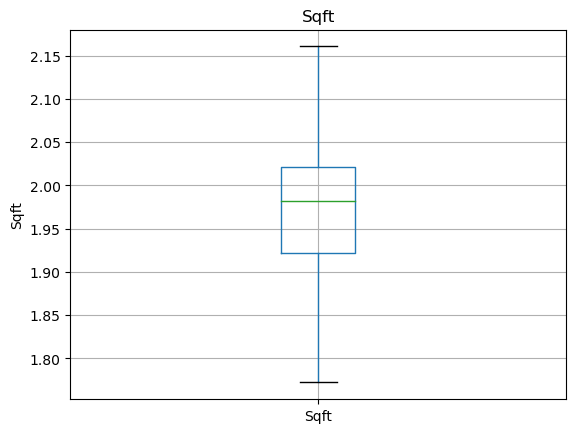

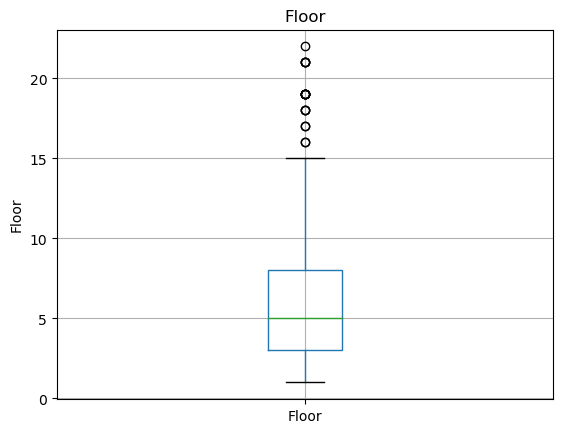

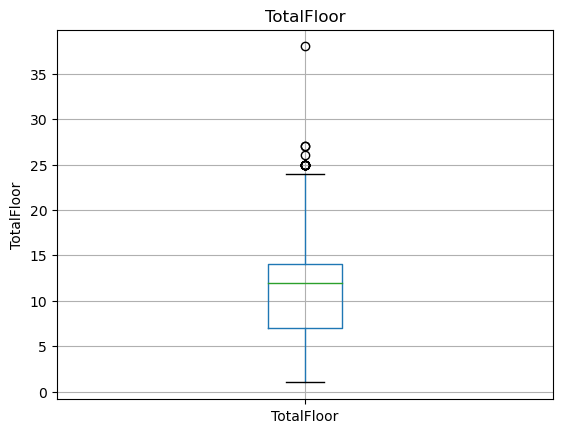

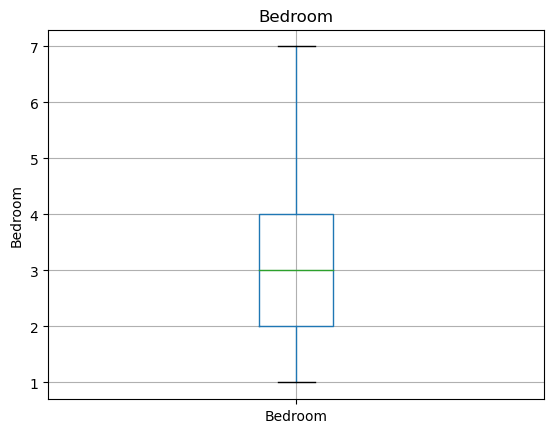

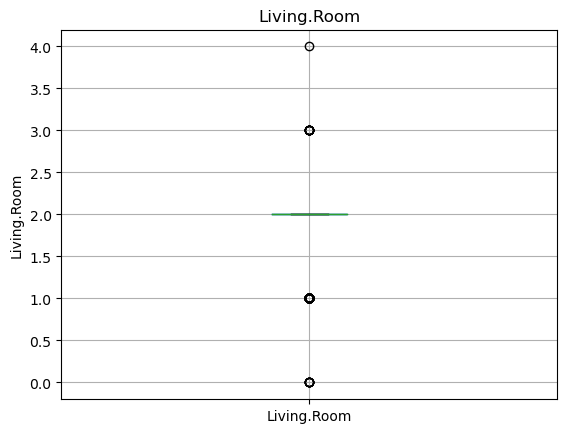

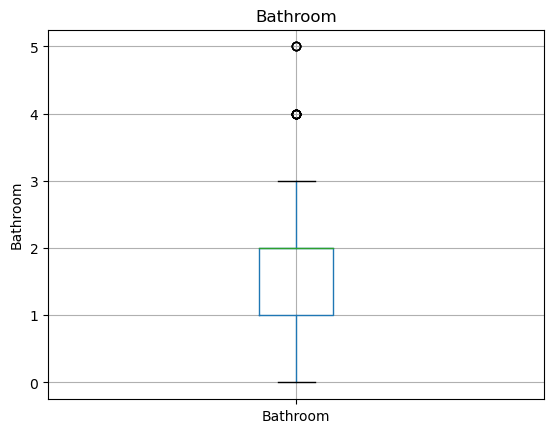

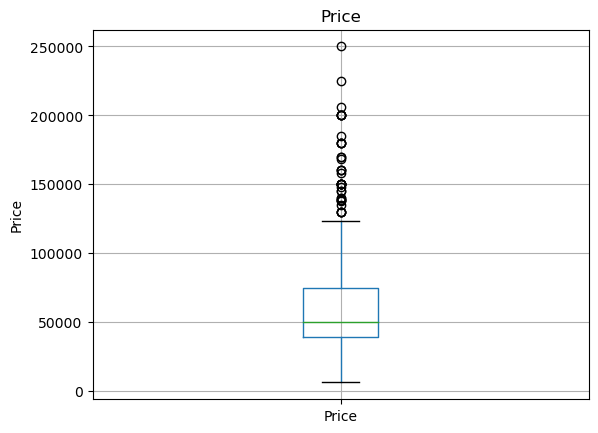

In [41]:
for feature in dataset:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
        

In [52]:
dataset.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1.956047,2,7,2,2,2,62000
1,2.036812,5,7,4,2,2,78000
2,1.951256,5,7,2,2,1,58000
3,1.985866,2,7,3,2,2,45000
4,1.927892,11,14,3,2,2,45000


In [79]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [89]:
X = dataset.drop("Price",axis =1)
y = dataset["Price"]

In [90]:
X = scaler.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 5)
print("X_train shape :",X_train.shape)
print("X_test shape:",X_test.shape)
print("y train shape :",y_train.shape)
print("y_test :",y_test.shape)

X_train shape : (516, 6)
X_test shape: (129, 6)
y train shape : (516,)
y_test : (129,)


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [95]:
reg = LinearRegression()

reg = reg.fit(X_train,y_train)

In [96]:
Y_pred = reg.predict(X_test)

In [97]:
mse = mean_squared_error(y_test,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X_test,Y_pred)

In [98]:
r2_score

1.0

In [129]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [132]:
lasso=Lasso()

In [133]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [134]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-523355987.159984


In [135]:
lasso_pred=lassocv.predict(X_test)

In [136]:
r2_score(lasso_pred, y_test)

0.0713132754663085

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [145]:
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 45)
  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
pred_y = gbr.predict(X_test)

In [150]:
# test set RMSE
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = reg.score(X_test,y_pred)

In [151]:
r2

0.9982466061537961

In [154]:
import xgboost as xg

In [156]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 

[20:41:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [157]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = reg.score(X_test,pred)

In [160]:
r2

0.76680097531001